In [1]:
%cd pyDRLinWESM
import os
os.getcwd()

C:\Users\theod\PycharmProjects\climate_policy_thesis\climate_policy_RL\pyDRLinWESM


'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL\\pyDRLinWESM'

In [2]:
import AYS.AYS_Environment as ays

In [3]:
env=ays.AYS_Environment(dt=1, reward_type='PB')

Init AYS Environment! 
Reward Type: PB 
Sustainability Boundaries [A_PB, Y_SF, S_ren]:  [3.45e+02 4.00e+13 0.00e+00]


In [4]:
from classes.Learn.utils import ReplayBuffer, plot
import gym
from tqdm.notebook import tqdm
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import classes.Learn.agents as ag
from importlib import reload

In [9]:
reload(ag)
action_dim = 4
state_dim = 3
# env = gym.make("MountainCar-v0")
# action_dim = 3
# state_dim = 2
agent = ag.DuellingDQN(state_dim, action_dim, gamma=0.99, alpha = 3e-4)

ONLINE_UPDATE = False
memory = ReplayBuffer(10000)
BATCH_SIZE = 64
MAX_EPISODES = 5000
RANDOM_EXPERIENCE = 100

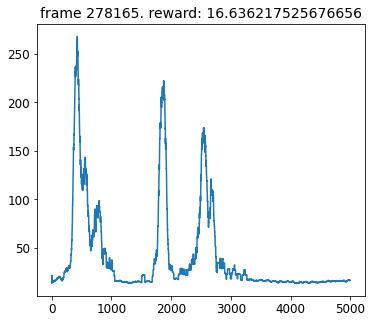

In [10]:
rewards = []
mean_rewards = []
frame_idx = 0
ep_len = []
actions = np.zeros(action_dim)

for episodes in range(MAX_EPISODES):
    state = env.reset()
    episode_reward = 0
    trajectory = []
    done = False
    
    while not done:
        if episodes>RANDOM_EXPERIENCE:
            action = agent.get_action(state)
        else:
            action = np.random.choice(action_dim)
            
        next_state, reward, done,= env.step(action)
        
        episode_reward += reward
        if ONLINE_UPDATE:
            agent.online_update((state, action, reward, next_state, done))
        else:
            memory.push(state, action, reward, next_state, done)
            if memory.__len__() > BATCH_SIZE:
                sample = memory.sample(BATCH_SIZE)
                loss = agent.update(sample)
                
        state = next_state
        
        frame_idx += 1 
        actions[action] += 1
        trajectory.append(int(action))
        
        

    # ep_len.append(steps)       
    rewards.append(episode_reward)
    mean_rewards.append(np.mean(rewards[-50:]))
#     if episodes % TARGET_UPDATE == 0:
#         dqn.target_net.load_state_dict(dqn.policy_net.state_dict()) 
        
    if episodes % 50:
        plot(frame_idx, mean_rewards)
        # if frame_idx%1000:
        #     print('\n ep_length: ',np.mean(ep_len[-50:]))
            # print('\n actions: ', trajectory)